In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
Incomedata = pd.read_csv('income.csv')
income = Incomedata['fnlwgt']
education = Incomedata['education']
occupation = Incomedata['occupation']
race = Incomedata['race']
gender = Incomedata['gender']
marital_status = Incomedata['marital-status']
age = Incomedata['age']

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'fnlwgt'),
  Text(0, 2.5, 'educational-num'),
  Text(0, 3.5, 'capital-gain'),
  Text(0, 4.5, 'capital-loss'),
  Text(0, 5.5, 'hours-per-week'),
  Text(0, 6.5, 'income_>50K')])

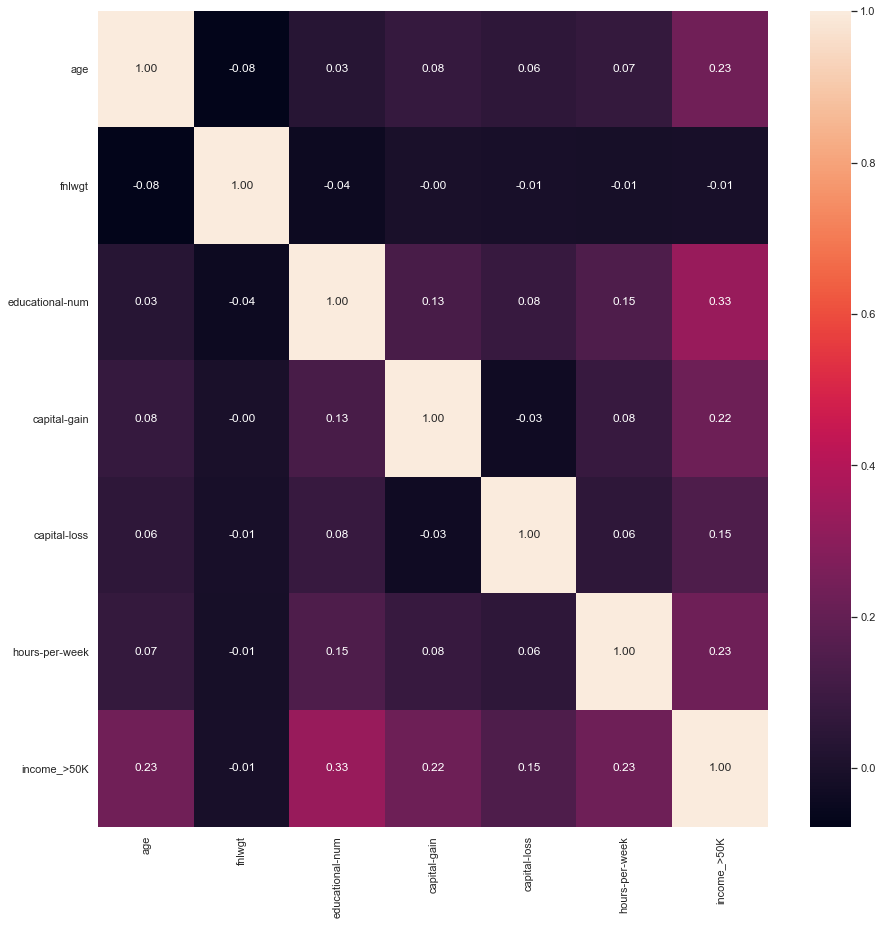

In [3]:
plt.figure(figsize=(15,15))
sb.heatmap(Incomedata.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

<AxesSubplot:>

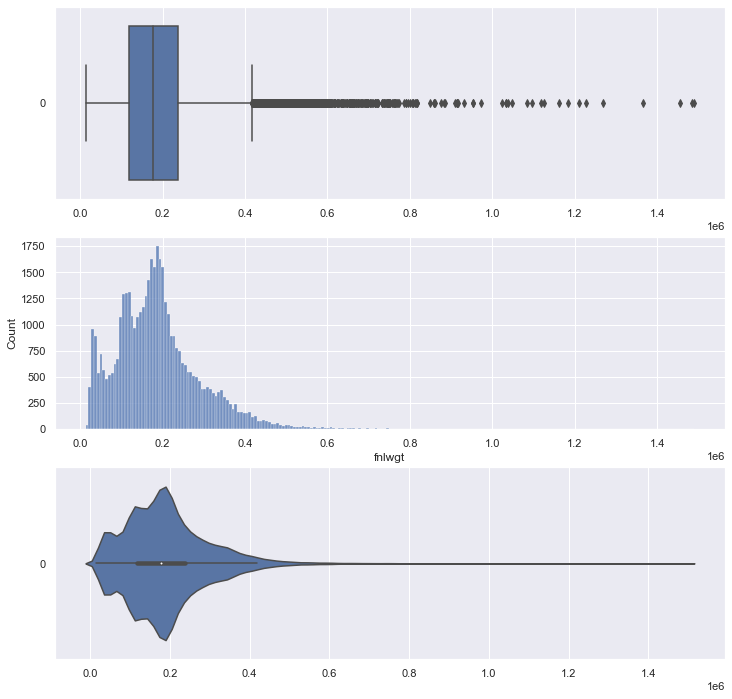

In [4]:
f, axes = plt.subplots(3, figsize=(12, 12))
sb.boxplot(data = income, orient = "h", ax = axes[0])
sb.histplot(data = income, ax = axes[1])
sb.violinplot(data = income, orient = "h", ax = axes[2])

Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64


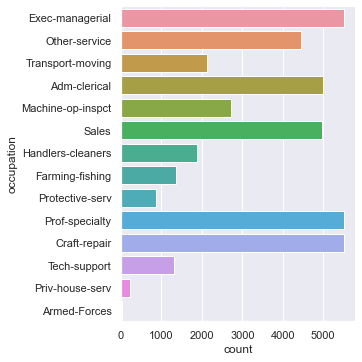

In [5]:
print(occupation.value_counts())
sb.catplot(y = "occupation", data = Incomedata, kind = "count")

Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64


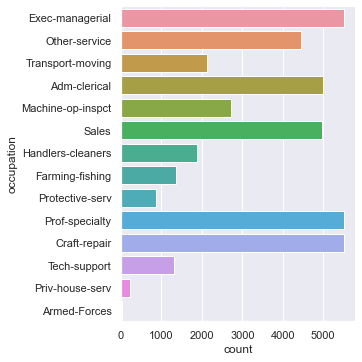

In [6]:
print(occupation.value_counts())
sb.catplot(y = "occupation", data = Incomedata, kind = "count")

White                 37572
Black                  4218
Asian-Pac-Islander     1373
Amer-Indian-Eskimo      421
Other                   373
Name: race, dtype: int64


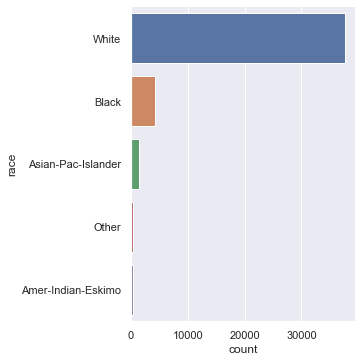

In [7]:
print(race.value_counts())
sb.catplot(y = "race", data = Incomedata, kind = "count")

Male      29400
Female    14557
Name: gender, dtype: int64


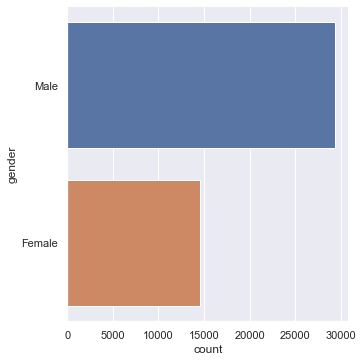

In [8]:
print(gender.value_counts())
sb.catplot(y = "gender", data = Incomedata, kind = "count")

Married-civ-spouse       20147
Never-married            14513
Divorced                  5971
Widowed                   1364
Separated                 1361
Married-spouse-absent      570
Married-AF-spouse           31
Name: marital-status, dtype: int64


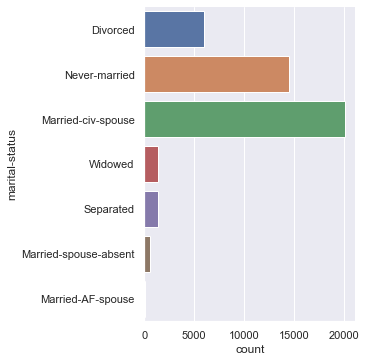

In [9]:
print(marital_status.value_counts())
sb.catplot(y = "marital-status", data = Incomedata, kind = "count")


33    1213
36    1212
31    1195
23    1194
35    1193
      ... 
88       6
85       4
89       2
87       2
86       1
Name: age, Length: 74, dtype: int64


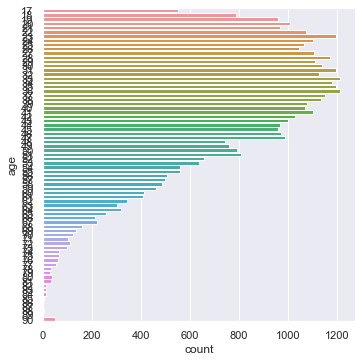

In [10]:
print(age.value_counts())
sb.catplot(y = "age", data = Incomedata, kind = "count")

<AxesSubplot:xlabel='gender', ylabel='fnlwgt'>

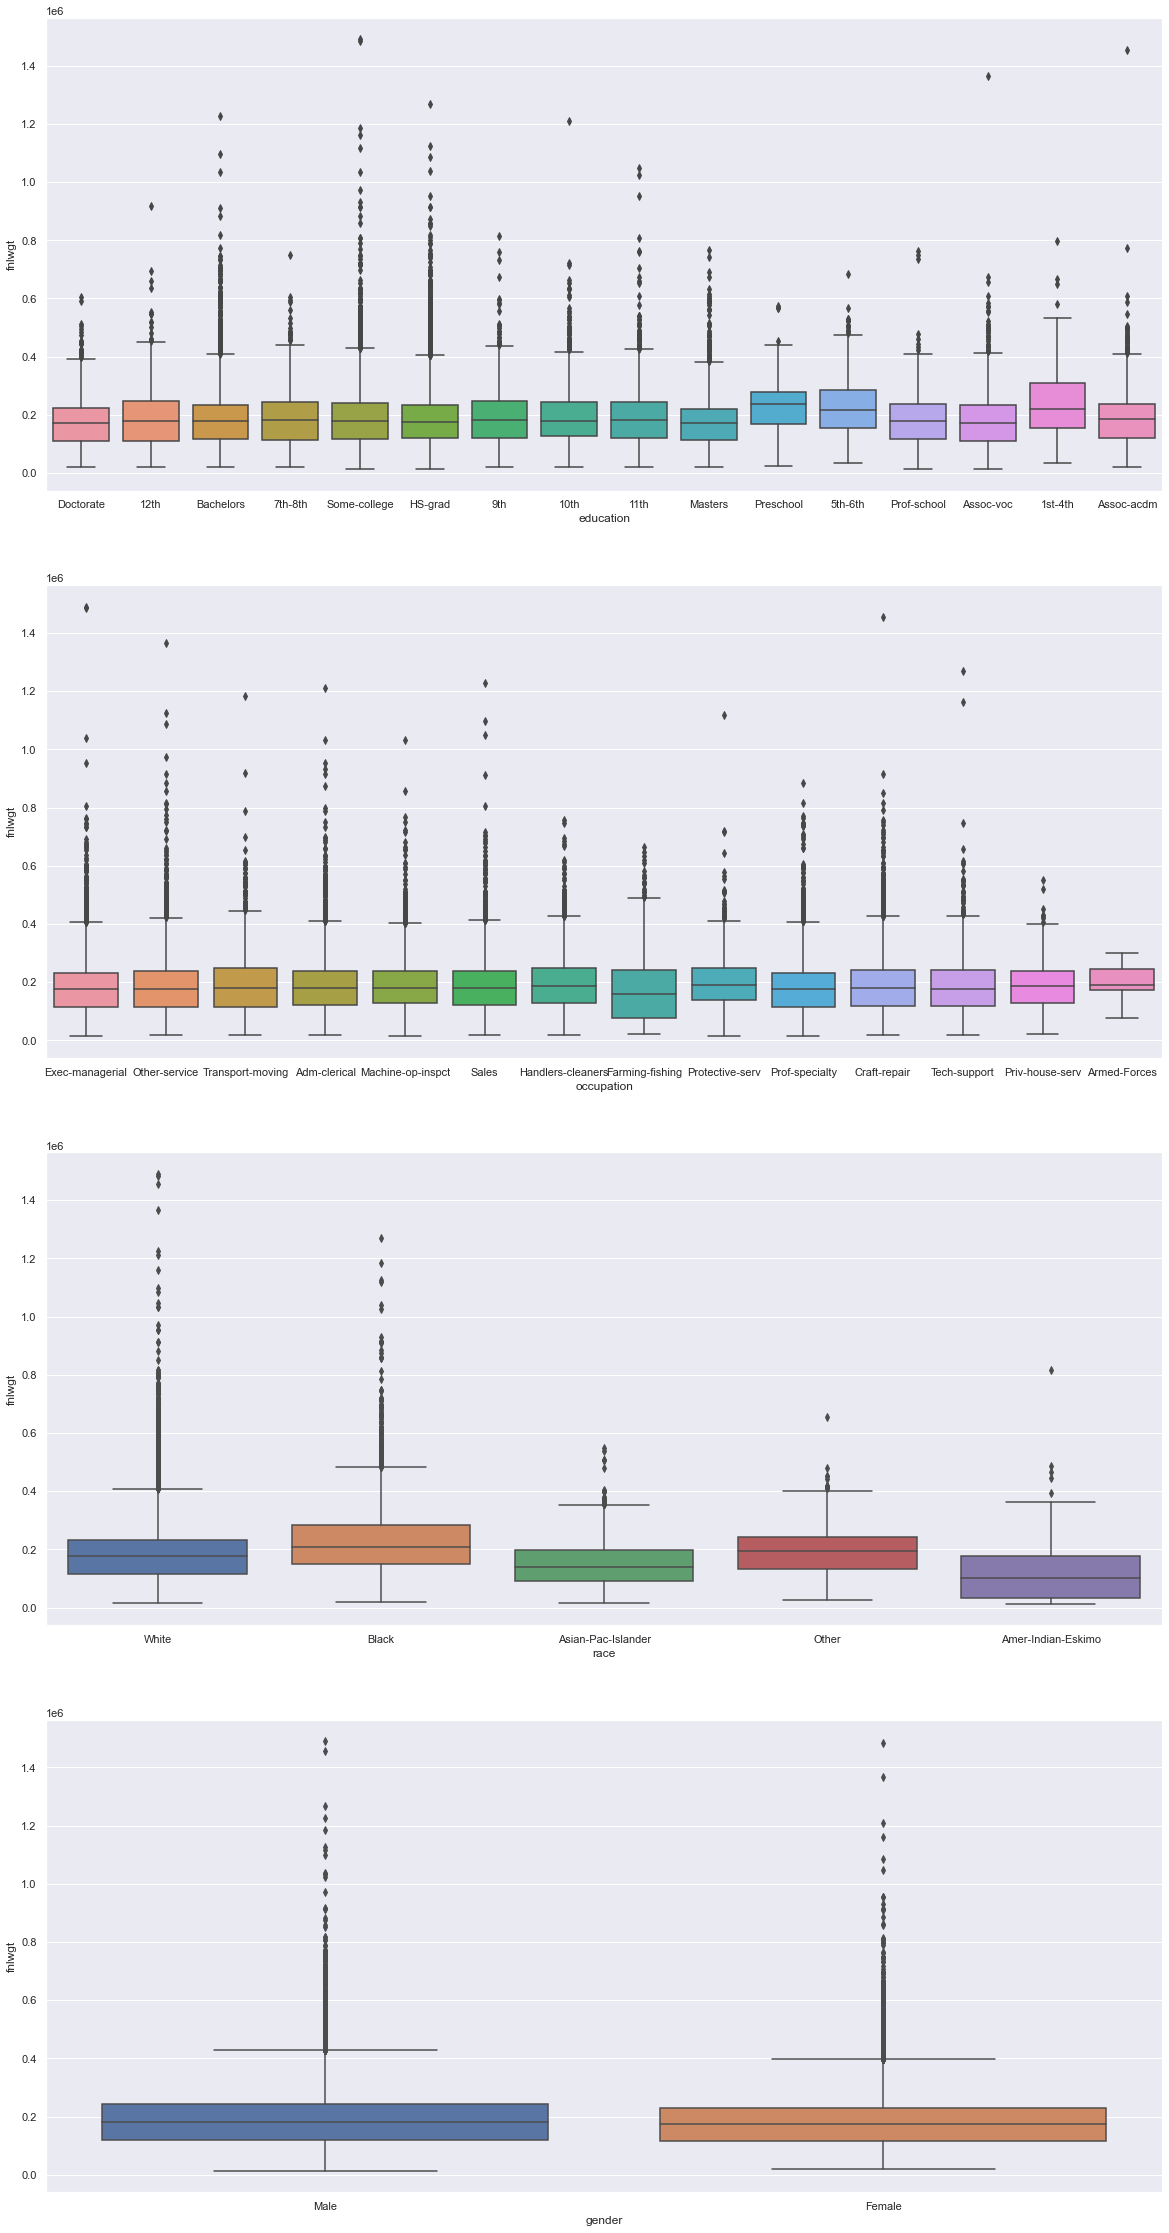

In [11]:
f, axes = plt.subplots(4,1,figsize=(20,40))
sb.boxplot(x='education', y='fnlwgt', data = Incomedata, ax = axes[0])
sb.boxplot(x='occupation', y='fnlwgt', data = Incomedata, ax = axes[1])
sb.boxplot(x='race', y='fnlwgt', data = Incomedata, ax = axes[2])
sb.boxplot(x='gender', y='fnlwgt', data = Incomedata, ax = axes[3])

In [12]:
x = [education,occupation,race,gender,marital_status,age]
y= income

In [13]:
#Find out if there is any varibles with missing data
for i in x:
    print(i.describe())
    print("\n")

count       43957
unique         16
top       HS-grad
freq        14197
Name: education, dtype: object


count            41451
unique              14
top       Craft-repair
freq              5519
Name: occupation, dtype: object


count     43957
unique        5
top       White
freq      37572
Name: race, dtype: object


count     43957
unique        2
top        Male
freq      29400
Name: gender, dtype: object


count                  43957
unique                     7
top       Married-civ-spouse
freq                   20147
Name: marital-status, dtype: object


count    43957.000000
mean        38.617149
std         13.734401
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64




In [14]:
#Filling empty columns in data of occupations as NaN since missing data is < 6% not very significant
occupation.fillna("NaN")

0          Exec-managerial
1            Other-service
2          Exec-managerial
3         Transport-moving
4            Other-service
               ...        
43952      Exec-managerial
43953        Other-service
43954                Sales
43955                Sales
43956    Handlers-cleaners
Name: occupation, Length: 43957, dtype: object

In [15]:
#Importing models to do Multi-Variate Classification Tree
from sklearn.tree import DecisionTreeClassifier
#Importing functions to split data in a random manner to split data for train and test
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [16]:
def oneHotEncode(original,target):
    dummy=pd.get_dummies(original[target]) 
    return dummy

def top3(original,target,num):
    top=original[target].value_counts()[:num].index
    original.loc[~original[target].isin(top), target] = 'OTHER'

Incomedata['education'] = Incomedata['education'].replace(['1st-4th','5th-6th'],'elementary-school')
Incomedata['education'] = Incomedata['education'].replace(['7th-8th'],'middle-school')
Incomedata['education'] = Incomedata['education'].replace(['9th','10th','11th','12th'],'high-school')
Incomedata['education'] = Incomedata['education'].replace(['Doctorate','Bachelors','Some-college','Masters','Prof-school','Assoc-voc','Assoc-acdm'],'postsecondary-education')
education=oneHotEncode(Incomedata,'education')

occupation = oneHotEncode(Incomedata,'occupation')

top=Incomedata['race'].value_counts()[:1].index
Incomedata.loc[~Incomedata['race'].isin(top), 'race'] = 'OTHER'
race = oneHotEncode(Incomedata,'race')

gender = oneHotEncode(Incomedata,'gender')

top=Incomedata['marital-status'].value_counts()[:3].index
Incomedata.loc[~Incomedata['marital-status'].isin(top), 'marital-status'] = 'OTHER'
marital_status = oneHotEncode(Incomedata,'marital-status')

x = pd.concat([education,occupation,race,gender,marital_status],axis=1)

x.describe()

,HS-grad,Preschool,elementary-school,high-school,middle-school,postsecondary-education,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,...,Tech-support,Transport-moving,OTHER,White,Female,Male,Divorced,Married-civ-spouse,Never-married,OTHER
count,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,...,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,0.322975,0.001729,0.015720,0.094820,0.019610,0.545146,0.113839,0.000296,0.125555,0.125259,...,0.030052,0.048252,0.145256,0.854744,0.331165,0.668835,0.135837,0.458334,0.330164,0.075665
std,0.467618,0.041545,0.124391,0.292969,0.138658,0.497963,0.317619,0.017195,0.331350,0.331016,...,0.170733,0.214300,0.352362,0.352362,0.470637,0.470637,0.342620,0.498267,0.470277,0.264464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg=linear_model.LinearRegression()
y = pd.DataFrame(Incomedata['fnlwgt'])

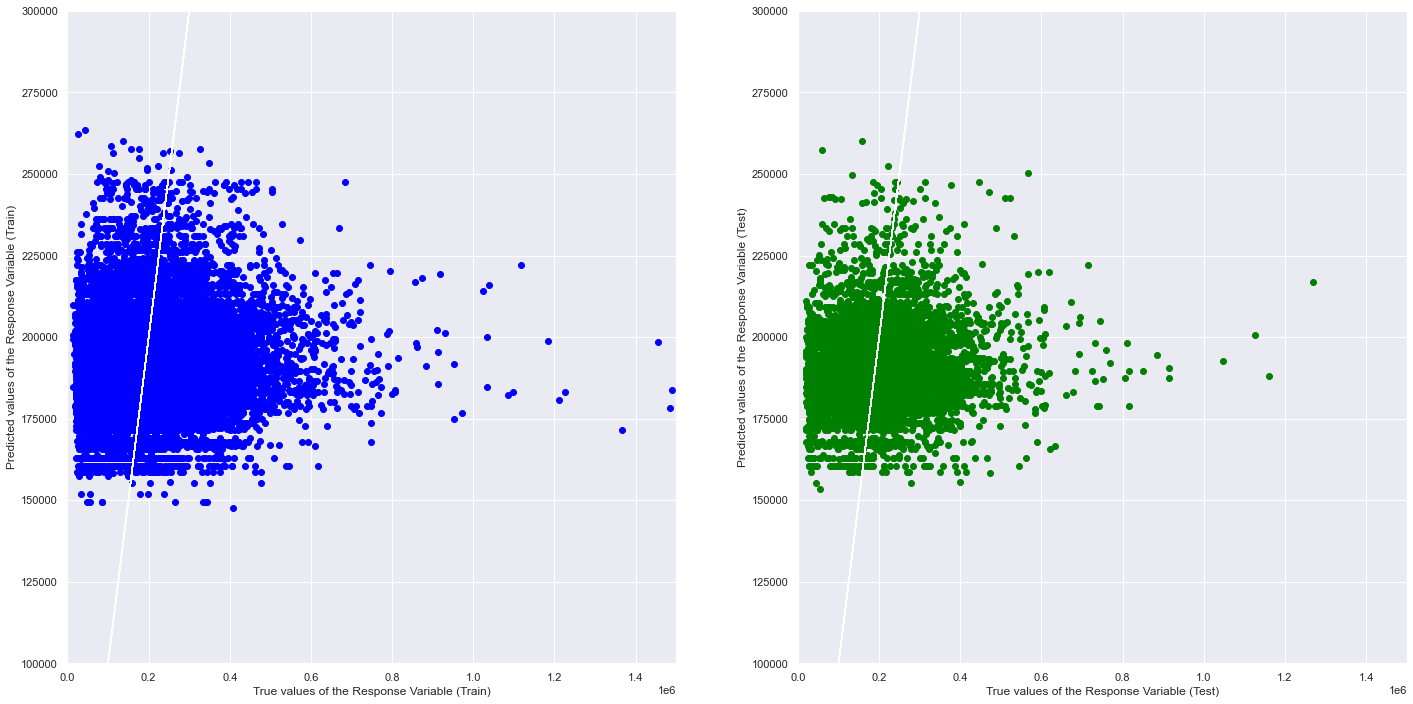

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.011528391672603444
Mean Squared Error (MSE) 	: 11046650987.770084

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.011065371553004466
Mean Squared Error (MSE) 	: 11162627491.174477



In [18]:
x_train, x_test , y_train , y_test = train_test_split(x,income, test_size=0.2)
reg.fit(x_train,y_train)

# Predict the Total values from Predictors
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].set_ylim(100000,300000)
axes[0].set_xlim(0,1500000)
axes[1].set_ylim(100000,300000)
axes[1].set_xlim(0,1500000)
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", reg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", reg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

There is no linear correlation between the variables and income, so we will proceed with binary classification to solve our question "How do we get rich?" by finding out what variables are needed to be above the 75th percentile

<AxesSubplot:ylabel='fnlwgt'>

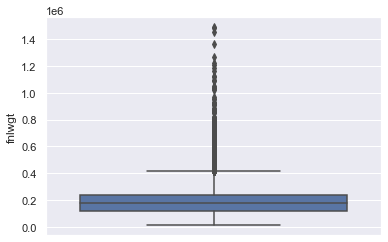

In [19]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

 
# Creating plot
#plt.boxplot(income)
sb.boxplot(y='fnlwgt', data = Incomedata)
 


In [20]:
Q3Income = Incomedata['fnlwgt'].quantile(0.5)
Q3Income

178100.0

In [21]:
newIncome = pd.DataFrame(Incomedata['fnlwgt'])
newIncome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   fnlwgt  43957 non-null  int64
dtypes: int64(1)
memory usage: 343.5 KB


In [22]:
newIncome['fnlwgt'].values[newIncome['fnlwgt'].values < Q3Income] = False
newIncome['fnlwgt'].values[newIncome['fnlwgt'].values >= Q3Income] = True

In [23]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors
xData_cat = Incomedata[['education','occupation','race','gender','marital-status']]
xData_cat['occupation'].fillna("NaN")
ohe.fit(xData_cat)
x_cat_ohe = pd.DataFrame(ohe.transform(xData_cat).toarray(),columns=ohe.get_feature_names(xData_cat.columns))
# Check the encoded variables
x_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   education_HS-grad                  43957 non-null  float64
 1   education_Preschool                43957 non-null  float64
 2   education_elementary-school        43957 non-null  float64
 3   education_high-school              43957 non-null  float64
 4   education_middle-school            43957 non-null  float64
 5   education_postsecondary-education  43957 non-null  float64
 6   occupation_Adm-clerical            43957 non-null  float64
 7   occupation_Armed-Forces            43957 non-null  float64
 8   occupation_Craft-repair            43957 non-null  float64
 9   occupation_Exec-managerial         43957 non-null  float64
 10  occupation_Farming-fishing         43957 non-null  float64
 11  occupation_Handlers-cleaners       43957 non-null  flo

In [24]:
# Combining Numeric features with the OHE Categorical features
xData_num = Incomedata['age']
xData_res = Incomedata['fnlwgt']
xData_ohe = pd.concat([xData_num, x_cat_ohe, xData_res], 
                           sort = False, axis = 1).reindex(index=xData_num.index)
xData_ohe['fnlwgt'].values[xData_ohe['fnlwgt'].values < Q3Income] = False
xData_ohe['fnlwgt'].values[xData_ohe['fnlwgt'].values >= Q3Income] = True

# Check the final dataframe
xData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                43957 non-null  int64  
 1   education_HS-grad                  43957 non-null  float64
 2   education_Preschool                43957 non-null  float64
 3   education_elementary-school        43957 non-null  float64
 4   education_high-school              43957 non-null  float64
 5   education_middle-school            43957 non-null  float64
 6   education_postsecondary-education  43957 non-null  float64
 7   occupation_Adm-clerical            43957 non-null  float64
 8   occupation_Armed-Forces            43957 non-null  float64
 9   occupation_Craft-repair            43957 non-null  float64
 10  occupation_Exec-managerial         43957 non-null  float64
 11  occupation_Farming-fishing         43957 non-null  flo

In [25]:
# Upsample Bad to match Good
from sklearn.utils import resample

xData_oheBad = xData_ohe[xData_ohe.fnlwgt == 0]
xData_oheGood = xData_ohe[xData_ohe.fnlwgt == 1]
 
# Upsample the Bad samples
xData_ohe_up = resample(xData_oheGood, 
                        replace=True,                     # sample with replacement
                        n_samples=xData_oheBad.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
xData_ohe_up = pd.concat([xData_oheBad, xData_ohe_up])
 
# Check the ratio of the classes
xData_ohe_up['fnlwgt'].value_counts()
xData_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43956 entries, 2 to 25799
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                43956 non-null  int64  
 1   education_HS-grad                  43956 non-null  float64
 2   education_Preschool                43956 non-null  float64
 3   education_elementary-school        43956 non-null  float64
 4   education_high-school              43956 non-null  float64
 5   education_middle-school            43956 non-null  float64
 6   education_postsecondary-education  43956 non-null  float64
 7   occupation_Adm-clerical            43956 non-null  float64
 8   occupation_Armed-Forces            43956 non-null  float64
 9   occupation_Craft-repair            43956 non-null  float64
 10  occupation_Exec-managerial         43956 non-null  float64
 11  occupation_Farming-fishing         43956 non-null  flo

In [26]:

newIncome.value_counts()

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(xData_ohe_up['fnlwgt'])
x = pd.DataFrame(xData_ohe_up.drop('fnlwgt', axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Train Data
Accuracy  :	 0.5419463087248322

TPR Train :	 0.3632534577949798
TNR Train :	 0.7203751065643649

FPR Train :	 0.2796248934356351
FNR Train :	 0.6367465422050202


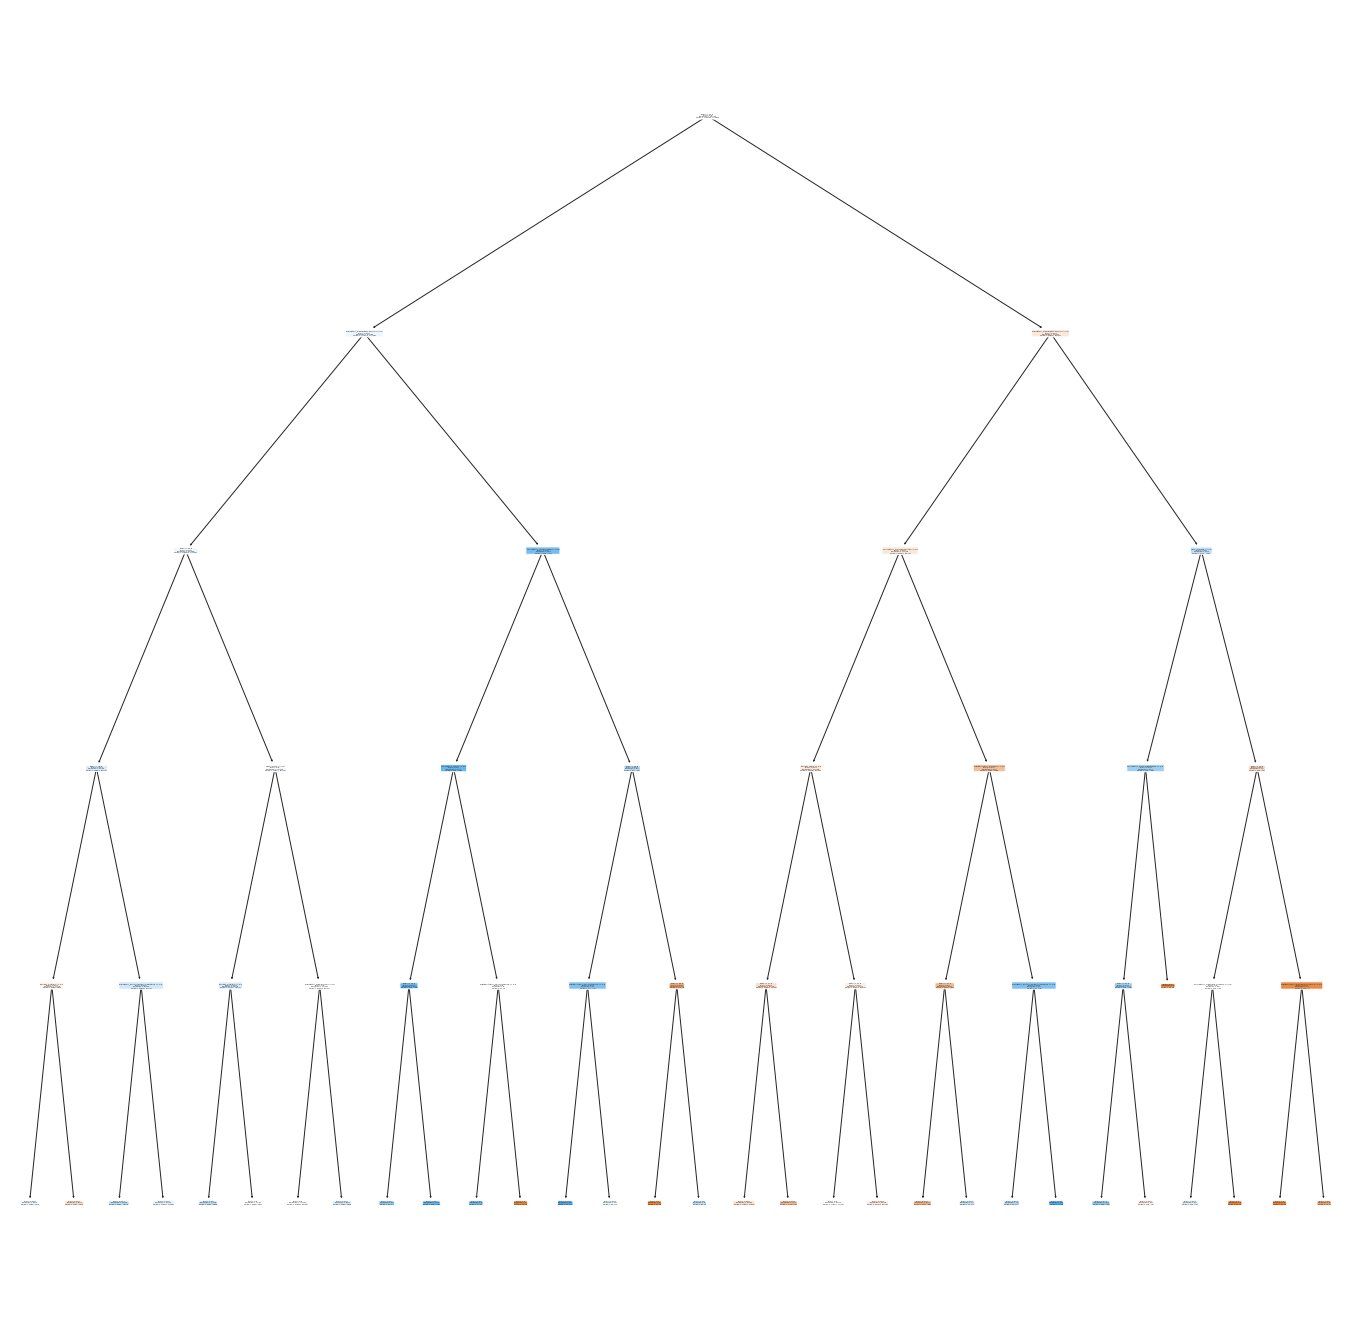

In [27]:


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth =5)  # change max_depth to experiment
dectree.fit(x_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns)


# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
#sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           #annot = True, fmt=".0f", annot_kws={"size": 18})

<AxesSubplot:>

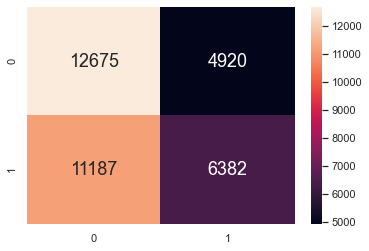

In [28]:
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
    annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5386715195632393

TPR Test :	 0.3669766386935813
TNR Test :	 0.7113848961898244

FPR Test :	 0.2886151038101757
FNR Test :	 0.6330233613064187


<AxesSubplot:>

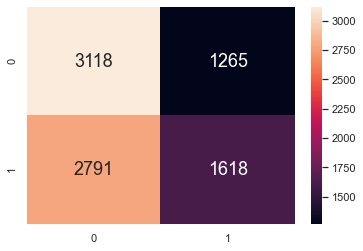

In [29]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [30]:
y_train.value_counts()

fnlwgt
0         17595
1         17569
dtype: int64

In [31]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 400,  # n_estimators denote number of trees
                                max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=400)

Train Data
Accuracy  :	 0.6059037652144238

TPR Train :	 0.5740793442996186
TNR Train :	 0.6376811594202898

FPR Train :	 0.36231884057971014
FNR Train :	 0.42592065570038135


<AxesSubplot:>

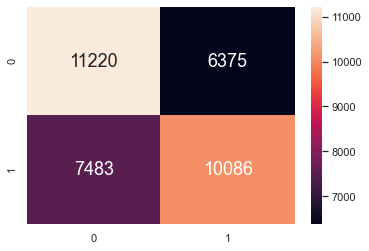

In [32]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5617606915377616

TPR Test :	 0.5293717396234974
TNR Test :	 0.594341775039927

FPR Test :	 0.40565822496007303
FNR Test :	 0.4706282603765026


<AxesSubplot:>

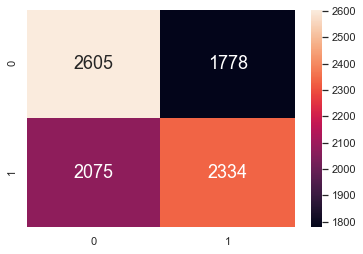

In [33]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [35]:

model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing="NaN",
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing='NaN', monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', predictor=None, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [37]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [38]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5611919927206551

In [ ]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(x_train, y_train.values.ravel())

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

In [ ]:
[https://www.kaggle.com/code/ruslansikhamov/detailed-eda-and-grade-prediction-using-xgboost
https://www.kaggle.com/code/mohaiminul101/student-grade-prediction-and-eda
https://www.kaggle.com/code/boopathymsse/income-prediction
https://www.kaggle.com/code/mammadabbasli/customer-income-prediction

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a601612-a336-4d1f-9220-3afb82dfdc9f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>